In [29]:
import geopandas as gpd
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import urllib.request
from shapely.geometry import LineString, Point, Polygon
import math
import matplotlib

from mapclassify import Quantiles, UserDefined

In [203]:
MQ_CARREAU_200_2017 = 'data/Filosofi2017_carreaux_200m_mart.csv'
df = pd.read_csv(MQ_CARREAU_200_2017)
df['n'] = df['Idcar_200m'].str[15:22].astype(int)
df['e'] = df['Idcar_200m'].str[23:].astype(int)
#df['geometry'] = df[['n', 'e']].apply(lambda x: Point(x[1], x[0]), axis=1)
df['geometry'] = df[['n', 'e']].apply(lambda x: Polygon([[x[1] + dy, x[0] + dx] for dx in [0,199] for dy in [199, 0]]), axis=1)
df['rev'] = df['Ind_snv'] / df['Ind']

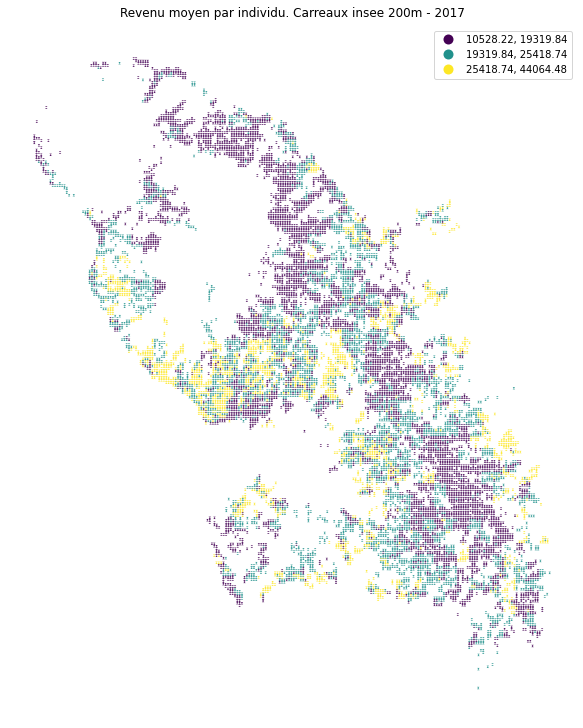

In [170]:
gdf = gpd.GeoDataFrame(df)
gdf = gdf.set_crs(crs_5490, allow_override=True)
#, crs=crs_5490)#'espg:5490')
#print(gdf.crs, gdf['geometry'].crs)
gdf = gdf.to_crs(epsg=4326)
#print(gdf.crs, gdf['geometry'].crs)

In [88]:
import pyproj
crs_5490 = pyproj.crs.CRS.from_user_input("""
PROJCRS["RGAF09 / UTM zone 20N",
    BASEGEOGCRS["RGAF09",
        DATUM["Reseau Geodesique des Antilles Francaises 2009",
            ELLIPSOID["GRS 1980",6378137,298.257222101,
                LENGTHUNIT["metre",1]]],
        PRIMEM["Greenwich",0,
            ANGLEUNIT["degree",0.0174532925199433]],
        ID["EPSG",5489]],
    CONVERSION["UTM zone 20N",
        METHOD["Transverse Mercator",
            ID["EPSG",9807]],
        PARAMETER["Latitude of natural origin",0,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8801]],
        PARAMETER["Longitude of natural origin",-63,
            ANGLEUNIT["degree",0.0174532925199433],
            ID["EPSG",8802]],
        PARAMETER["Scale factor at natural origin",0.9996,
            SCALEUNIT["unity",1],
            ID["EPSG",8805]],
        PARAMETER["False easting",500000,
            LENGTHUNIT["metre",1],
            ID["EPSG",8806]],
        PARAMETER["False northing",0,
            LENGTHUNIT["metre",1],
            ID["EPSG",8807]]],
    CS[Cartesian,2],
        AXIS["(E)",east,
            ORDER[1],
            LENGTHUNIT["metre",1]],
        AXIS["(N)",north,
            ORDER[2],
            LENGTHUNIT["metre",1]],
    USAGE[
        SCOPE["Engineering survey, topographic mapping."],
        AREA["French Antilles onshore and offshore west of 60°W - Guadeloupe (including Grande Terre, Basse Terre, Marie Galante, Les Saintes, Iles de la Petite Terre, La Desirade); Martinique; St Barthélemy; northern St Martin."],
        BBOX[14.08,-63.66,18.31,-60]],
    ID["EPSG",5490]]
""")

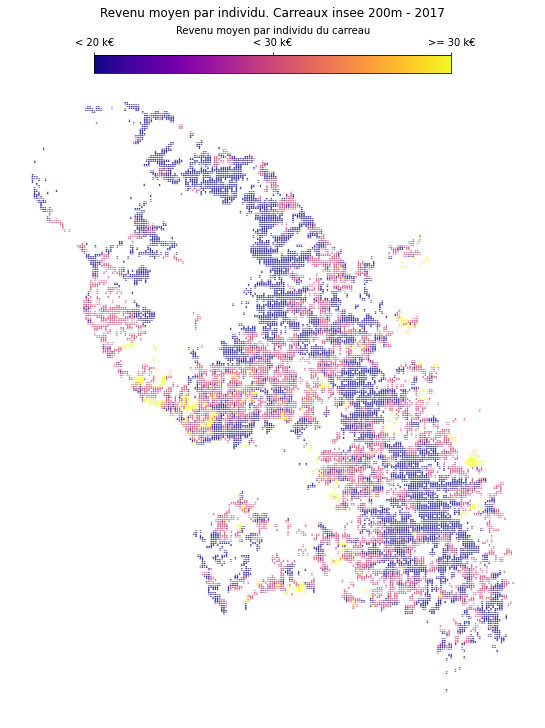

In [207]:
cmap = matplotlib.cm.plasma

fig, ax = plt.subplots(1, 1, constrained_layout=True, figsize=(10, 10))
fig.suptitle("Revenu moyen par individu. Carreaux insee 200m - 2017")

gdf = gdf.assign(cl=UserDefined(df['rev'].dropna(), [20000, 30000]).yb)

title_rev = ['< 20 k€', '< 30 k€', '>= 30 k€']
kfmt = lambda x, pos: title_rev[int(x)]

gdf.plot(ax=ax, column='cl',  k=2, legend=True, cmap=cmap, #scheme='NaturalBreaks',)
 legend_kwds={"pad": 0, "location":"top", "orientation":"horizontal", "ticks":[0, 1, 2],
              "label": "Revenu moyen par individu du carreau", "shrink":0.5, "format": kfmt})
_ = ax.axis("off")

In [185]:

Quantiles(gdf['rev'], 3).bins

array([17941.42074074, 22108.27424242, 44064.47575758])

,Idcar_200m,I_est_200,Idcar_1km,I_est_1km,Idcar_nat,Groupe,Ind,Men_1ind,Men_5ind,Men_prop,...,Ind_80p,Ind_inc,Men_pauv,Men,lcog_geo,n,e,geometry,rev,cl
0,CRS5490RES200mN1592600E728800,1,CRS5490RES1000mN1592000E728000,1,CRS5490RES4000mN1592000E728000,174380,1.0,0.2,0.1,0.2,...,0.0,0.0,0.1,0.4,97226.0,1592600,728800,"POLYGON ((-60.87620 14.39620, -60.87804 14.396...",19527.600000,1
1,CRS5490RES200mN1594200E728800,1,CRS5490RES1000mN1594000E728000,1,CRS5490RES4000mN1592000E728000,174380,6.0,1.4,0.4,1.2,...,0.0,0.0,0.4,2.6,97226.0,1594200,728800,"POLYGON ((-60.87606 14.41065, -60.87791 14.410...",19527.633333,1
2,CRS5490RES200mN1594400E729600,1,CRS5490RES1000mN1594000E729000,1,CRS5490RES4000mN1592000E728000,174380,5.0,1.2,0.3,1.0,...,0.0,0.0,0.3,2.2,97226.0,1594400,729600,"POLYGON ((-60.86863 14.41239, -60.87047 14.412...",19527.640000,1
3,CRS5490RES200mN1594600E730000,1,CRS5490RES1000mN1594000E730000,1,CRS5490RES4000mN1592000E728000,174380,1.0,0.2,0.1,0.2,...,0.0,0.0,0.1,0.4,97226.0,1594600,730000,"POLYGON ((-60.86490 14.41417, -60.86675 14.414...",19527.600000,1
4,CRS5490RES200mN1595400E728800,1,CRS5490RES1000mN1595000E728000,1,CRS5490RES4000mN1592000E728000,174380,3.0,0.7,0.2,0.6,...,0.0,0.0,0.2,1.3,97226.0,1595400,728800,"POLYGON ((-60.87596 14.42150, -60.87780 14.421...",19527.633333,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11127,CRS5490RES200mN1645400E699800,0,CRS5490RES1000mN1645000E699000,0,CRS5490RES8000mN1640000E696000,1021172,112.0,23.0,3.0,30.0,...,12.0,0.0,25.0,51.0,97215.0,1645400,699800,"POLYGON ((-61.14103 14.87560, -61.14288 14.875...",15862.400000,0
11128,CRS5490RES200mN1645400E700000,0,CRS5490RES1000mN1645000E700000,0,CRS5490RES8000mN1640000E696000,1021179,164.0,30.0,8.0,38.0,...,14.0,0.0,33.0,70.0,97215.0,1645400,700000,"POLYGON ((-61.13917 14.87558, -61.14102 14.875...",14910.003049,0
11129,CRS5490RES200mN1645400E700200,0,CRS5490RES1000mN1645000E700000,0,CRS5490RES8000mN1640000E696000,1021177,80.0,8.0,5.0,9.0,...,2.0,0.0,14.0,26.0,97215.0,1645400,700200,"POLYGON ((-61.13731 14.87557, -61.13916 14.875...",14298.436250,0
11130,CRS5490RES200mN1645600E699000,1,CRS5490RES1000mN1645000E699000,0,CRS5490RES8000mN1640000E696000,1021167,3.0,0.6,0.1,0.6,...,0.5,0.0,0.6,1.3,97215.0,1645600,699000,"POLYGON ((-61.14845 14.87747, -61.15030 14.877...",16122.833333,0
